<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass4/hpdp/PERgolakan/ass4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering on eCommerce behavior data from multi category store

## Group Members

|    Name           |           Matric Number       |                      
|-------------------|-------------------------------|
|Muhammad Adam Fahmi Bin Mohd Taufiq    | A21EC0061 |
|Muhammad Farhan Bin Ibrahim|        A21EC0072      |
|Muhammad Fikri Bin Sharunazim |A21EC0075|
|Mikhail Bin Yassin |A21EC0053                      |

---
#Overview
**eCommerce behavior data from multi category store**

This file contain behavior data for 7 months (from October 2019 to April 2020) from a large multi-category online store.

Each row in the file represents an event. All events are related to products and users. Each event is like many-to-many relation between products and users.

Data collected by Open CDP project. Feel free to use open source customer data platform.

How to read it
There are different types of events. See below.

[ Semantics (or how to read it): User user_id during session user_session added to shopping cart (property event_type is equal cart) product product_id of brand brand of category category_code (category_code) with price price at event_time ]

-------------------------------------------------------------------------

**File structure:**

'event_time' = Time when event happened at (in UTC).

'event_type' = Only one kind of event: purchase.

'product_id' = ID of a product.

'category_id' = Product's category ID.

'category_code' = Product's category taxonomy (code name) if possible. Usually present for meaningful categories, skipped for accessories.

'brand' = Downcased string of brand name. Can be missed.

'price' = Float price of a product. Present.

'user_id' = Permanent user ID.

'user_session' = Temporary user's session ID. Same for each user's session. Changes when the user returns from a long pause.

--------------------------------------------------------------------------

**Event types**
Events can be:

- view - a user viewed a product
- cart - a user added a product to shopping cart
- remove_from_cart - a user removed a product from shopping cart
- purchase - a user purchased a product

-------------------------------------------------------------------------

**Note that**:
Multiple purchases per session

A session can have multiple purchase events. It's ok, because it's a single order.



## Import Dataset from kaggle

In [1]:
! pip install -q kaggle

In [2]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"adamfahmiadamochie","key":"751d5dc469fe52ec46996241aed1e097"}'}

In [3]:
# Install Kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store
! unzip ecommerce-behavior-data-from-multi-category-store.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 4.28G/4.29G [00:50<00:00, 178MB/s]
100% 4.29G/4.29G [00:50<00:00, 91.2MB/s]
Archive:  ecommerce-behavior-data-from-multi-category-store.zip
  inflating: 2019-Nov.csv            
replace 2019-Oct.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Install Necessary Tools & Libraries

In [4]:
import numpy as np
import pandas as pd
import os

We only use the 2019 Oct data, it it to lessen the usage of RAM we remove unnecessery data

In [5]:
os.remove('2019-Nov.csv')
os.remove('ecommerce-behavior-data-from-multi-category-store.zip')

In [6]:
# Reading the data in chunks
data = pd.read_csv('2019-Oct.csv',usecols=["event_time", "event_type", "product_id", "category_id", "category_code", "brand", "price", "user_id"], chunksize=300000)

# Concatenating the chunks together
df = pd.concat(data)

In [ ]:
df.head(4)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854


## Handling Missing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 2.5+ GB


In [ ]:
# number of rows & columns
df.shape

(42448764, 8)

In [ ]:
# check for missing values
df.isna().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
dtype: int64

In [ ]:
# Calculate memory usage for the original DataFrame
original_memory = df.memory_usage(deep=True).sum()

# Convert bytes to megabytes
original_memory_mb = original_memory / (1024 * 1024)  # 1 MB = 1024*1024 bytes

print(f"The memory usage is: {original_memory:.2f} MB")

The memory usage is: 12560643793.00 MB


To reduce the size of our dataset we can try to change the datatype

In [7]:
# change the datatype 'product_id' from int64 to int32
df['product_id'] = df['product_id'].astype('int32')

In [ ]:
# check 'product_id' column highest value
max_value = df['product_id'].max()
# check 'product_id' column lowest value
min_value = df['product_id'].min()

print(f"The highest value in 'product_id': {max_value}")
print(f"The lowest value in 'product_id': {min_value}")

The highest value in 'product_id': 60500010
The lowest value in 'product_id': 1000978


In [ ]:
# check 'category_id' column highest value
max_value = df['category_id'].max()
# check 'product_id' column lowest value
min_value = df['category_id'].min()

print(f"The highest value in 'category_id': {max_value}")
print(f"The lowest value in 'category_id': {min_value}")

The highest value in 'category_id': 2175419595093967522
The lowest value in 'category_id': 2053013552226107603


In [ ]:
# check 'user_id' column highest value
max_value = df['user_id'].max()
# check 'user_id' column lowest value
min_value = df['user_id'].min()

print(f"The highest value in 'user_id': {max_value}")
print(f"The lowest value in 'user_id': {min_value}")

The highest value in 'user_id': 566280860
The lowest value in 'user_id': 33869381


In [8]:
# change the datatype 'user_id' from int64 to int32
df['user_id'] = df['user_id'].astype('int32')

In [9]:
# change 'event_time' from object to datetime
df['event_time'] = pd.to_datetime(df['event_time'])

In [ ]:
# check 'price' highest value
highest_value = df['price'].max()

# check 'price' lowest value
lowest_value = df['price'].min()

print(f"The highest value in the price is: {highest_value}")
print(f"The lowest value in the price is: {lowest_value}")

The highest value in the price is: 2574.07
The lowest value in the price is: 0.0


In [10]:
#change 'price' from float64 to float16
df['price'] = df['price'].astype('float16')

In [ ]:
# check the unique value in dataset
value_counts = df['event_type'].value_counts()
print(value_counts)

unique_values = df['event_type'].unique()
print(unique_values)

view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64
['view' 'purchase' 'cart']


In [11]:
# change 'event_type' from object to categorical
df['event_type'] = df['event_type'].astype('category')

In [ ]:
# check the unique value in category_code
value_counts = df['category_code'].value_counts()
print(value_counts)

unique_values = df['category_code'].unique()
print(unique_values)

electronics.smartphone          11507231
electronics.clocks               1311033
computers.notebook               1137623
electronics.video.tv             1113750
electronics.audio.headphone      1100188
                                  ...   
construction.tools.soldering         632
apparel.shorts                       632
apparel.jacket                       436
auto.accessories.anti_freeze         308
country_yard.furniture.bench         190
Name: category_code, Length: 126, dtype: int64
[nan 'appliances.environment.water_heater' 'furniture.living_room.sofa'
 'computers.notebook' 'electronics.smartphone' 'computers.desktop'
 'apparel.shoes.keds' 'appliances.kitchen.microwave'
 'furniture.bedroom.bed' 'electronics.video.tv' 'appliances.kitchen.mixer'
 'electronics.audio.headphone' 'appliances.environment.air_heater'
 'apparel.shoes' 'appliances.environment.vacuum'
 'appliances.kitchen.refrigerators' 'appliances.kitchen.washer'
 'computers.peripherals.monitor' 'construction.tools.pu

In [12]:
# Target encoding: change 'category_code' from object to string
df['category_code'] = df['category_code'].astype('string')

In [ ]:
# check the unique value in brand
value_counts = df['brand'].value_counts()
print(value_counts)

unique_values = df['brand'].unique()
print(unique_values)

samsung         5282775
apple           4122554
xiaomi          3083763
huawei          1111205
lucente          655861
                 ...   
nec                   1
neocoregames          1
incase                1
portdesigns           1
skindoctors           1
Name: brand, Length: 3444, dtype: int64
['shiseido' 'aqua' nan ... 'ecolaboratorie' 'organicshop' 'skindoctors']


In [13]:
# Target encoding: change 'brand' from object to string
df['brand'] = df['brand'].astype('string')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     category           
 2   product_id     int32              
 3   category_id    int64              
 4   category_code  string             
 5   brand          string             
 6   price          float16            
 7   user_id        int32              
dtypes: category(1), datetime64[ns, UTC](1), float16(1), int32(2), int64(1), string(2)
memory usage: 1.7 GB


## EDA on eCommerce behavior data from multi category store: [Assignment 3 ](https://colab.research.google.com/drive/1loaIl9Xj3X6foiRG5GrJXuxLYf6shEZG?authuser=3&usp=drive_open)

## Feature Selection
Some of the features selected based on initial analysis are:

'event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id'

##Feature Preprocessing

In [15]:
# Handle missing values
df['category_code'].fillna('Unknown', inplace=True)  # Fill missing category codes with 'Unknown'
df['brand'].fillna('Unknown', inplace=True)  # Fill missing brand names with 'Unknown'

For encoding categorical variables, we already change the 'category_code' and 'brand' to string data type in data cleaning

In [16]:
# Handling outliers
# Assuming you want to cap extreme prices
price_upper_limit = df['price'].quantile(0.99)
df['price'] = np.where(df['price'] > price_upper_limit, price_upper_limit, df['price'])

## Feature Transformation

In [17]:
# Standardize or normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['price']] = scaler.fit_transform(df[['price']])

In [18]:
# Time-based Features
df['hour_of_day'] = df['event_time'].dt.hour
df['day_of_week'] = df['event_time'].dt.dayofweek
df['month'] = df['event_time'].dt.month

In [19]:
# Applying Log transformation for skewed data
df['log_price'] = np.log1p(df['price'])

## Feature Creation

In [20]:
# Aggregated features
df['average_price_per_category'] = df.groupby('category_id')['price'].transform('mean')
df['average_price_per_brand'] = df.groupby('brand')['price'].transform('mean')

**The Interaction features below creates two new features:**

 'view_to_purchase_ratio' and 'cart_to_purchase_ratio'. These features represent the ratio of purchases to interactions for 'view' and 'cart' events, respectively. Additionally, two aggregated features are created, representing the average price per category and average price per brand.

In [ ]:
# Interaction features
df['view_to_purchase_ratio'] = df[df['event_type'] == 'view']['session_purchase_count'] / df[df['event_type'] == 'view']['session_interaction_count']
df['cart_to_purchase_ratio'] = df[df['event_type'] == 'cart']['session_purchase_count'] / df[df['event_type'] == 'cart']['session_interaction_count']


## Visualization

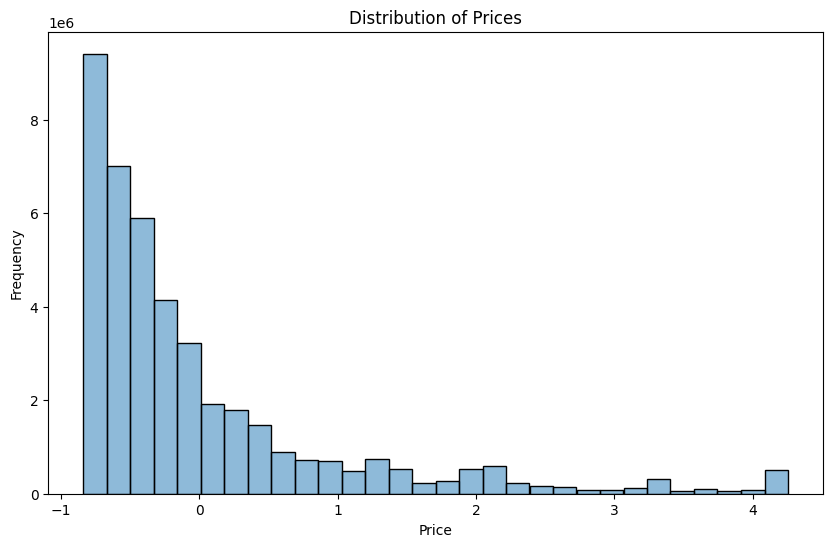

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of skewed feature: prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

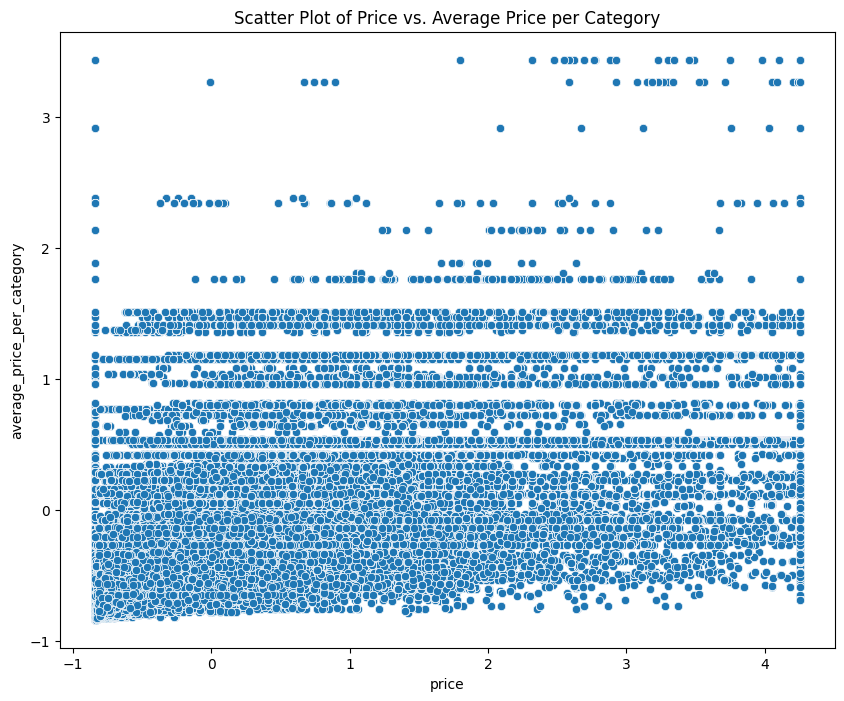

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='average_price_per_category', data=df)
plt.title('Scatter Plot of Price vs. Average Price per Category')
plt.show()

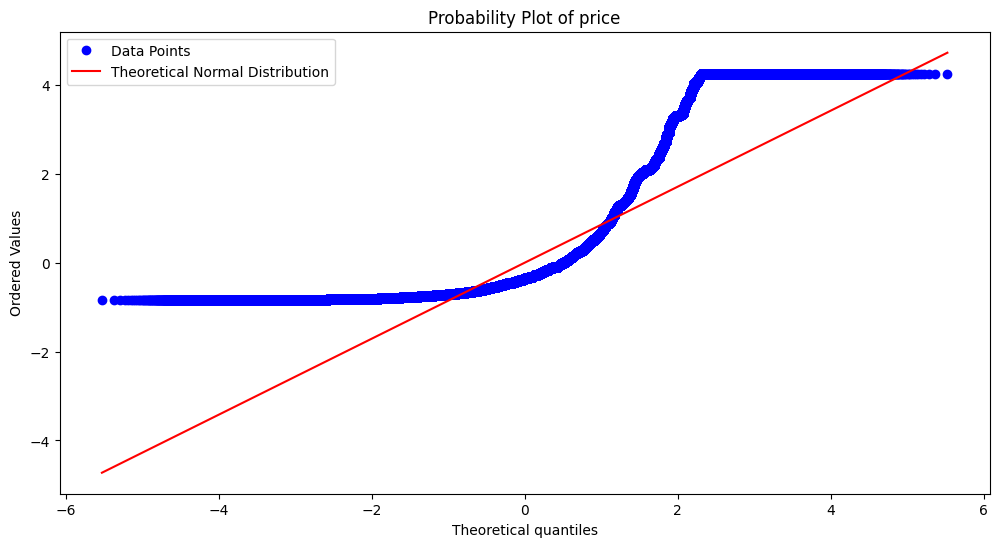

In [22]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns

# Probability plot (Q-Q plot)
# Skewed data visualization
skewed_feature = 'price'
plt.figure(figsize=(12, 6))
probplot(df['price'], plot=plt)
plt.title(f'Probability Plot of price')
plt.legend(['Data Points', 'Theoretical Normal Distribution'], loc='best')
plt.show()

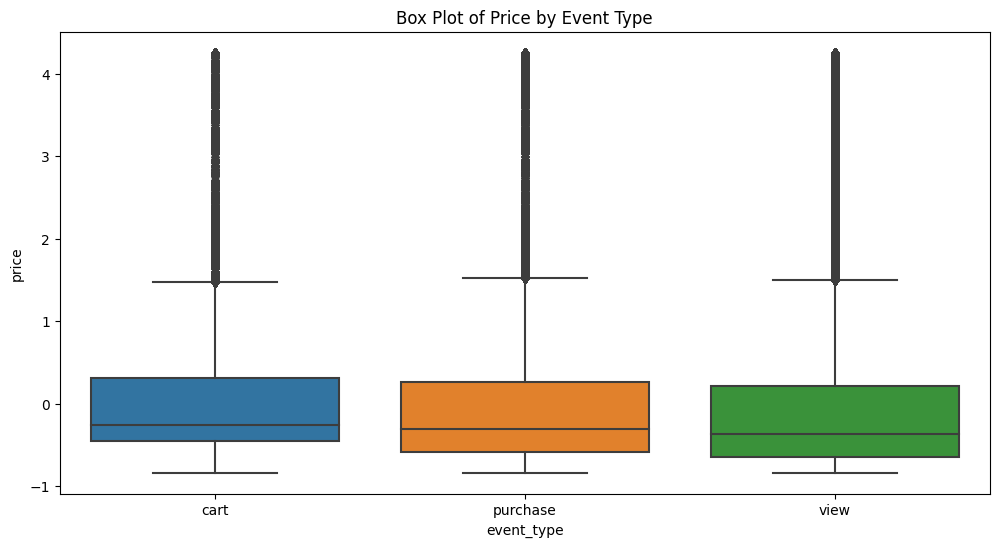

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_type', y='price', data=df)
plt.title('Box Plot of Price by Event Type')
plt.show()

<ipython-input-21-f96464a2691e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


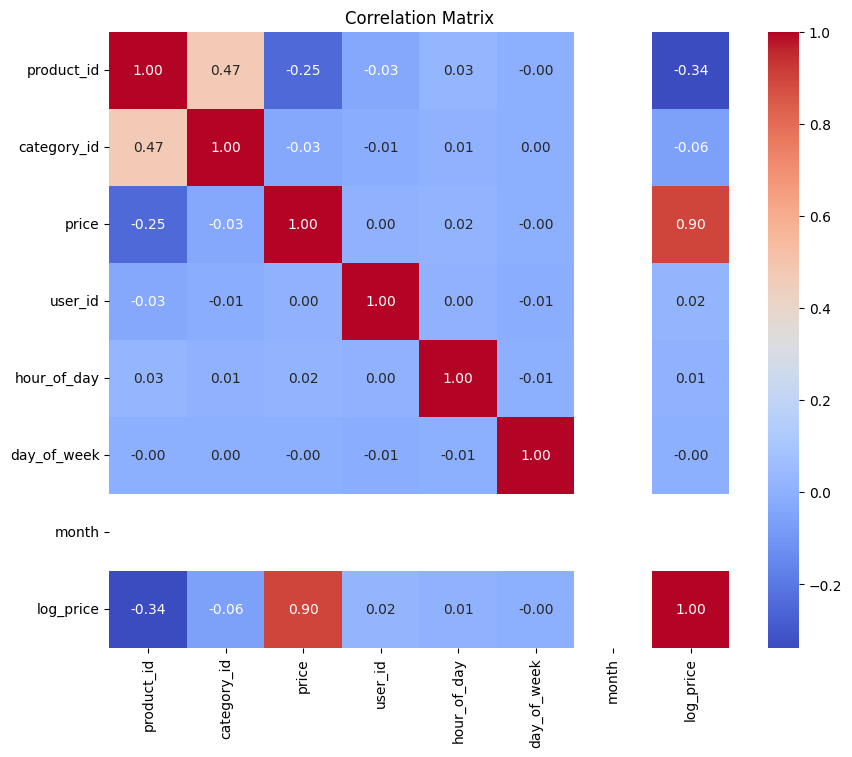

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

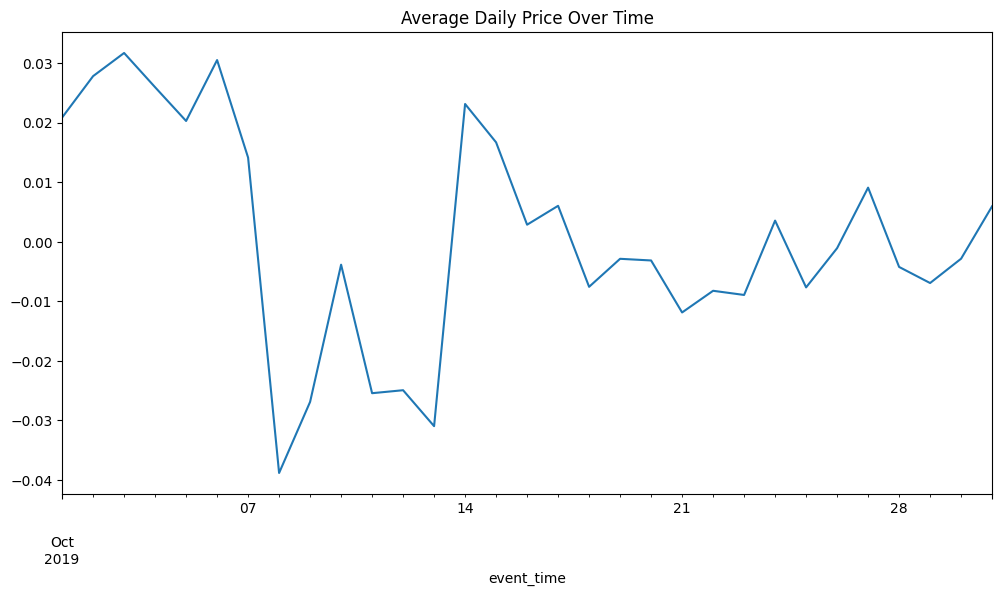

In [ ]:
plt.figure(figsize=(12, 6))
df.set_index('event_time')['price'].resample('D').mean().plot()
plt.title('Average Daily Price Over Time')
plt.show()

## Conclusion

In conclusion, the feature engineering process aimed to enhance the eCommerce behavior dataset for subsequent machine learning tasks. Relevant features, including 'event_time,' 'event_type,' 'product_id,' 'category_id,' 'category_code,' 'brand,' 'price,' and 'user_id,' were selected. Missing values in the 'brand' column were filled with 'Unknown,' and categorical variables were encoded. Outliers in the 'price' column were addressed by capping extreme values, and time-based features were extracted to capture temporal patterns. Skewed data in the 'price' column underwent a log transformation.

Interaction features and aggregated features were introduced to provide insights into user engagement and mean prices within categories and brands, respectively.

These decisions were driven by a combination of domain knowledge, common feature engineering practices, and a tailored understanding of the eCommerce behavior data, with the goal of creating a more informative and robust feature set for subsequent analyses and model building. Further iterations may be required based on model performance and additional insights gained during the analysis of the transformed dataset.